# Code to reproduce Figures 3, 4, 5, 7 & 8 of <br> Friedrich, Cao, Carroll, Cheng & Singh (2024)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Defining a number of constants
L_Planck_in_SI = 1.616255e-35
E_Planck_in_SI = 1.956e9
E_Planck_in_eV = 1.2209e28
R_hubble_prefactor = 2.9979*3.0857*1.0e25/L_Planck_in_SI
h = 0.7

R_Hubble_in_Planck = R_hubble_prefactor/h
L_IR = 4.4963302789e+00*R_Hubble_in_Planck # particle horizon at a->infty for (Omega_m = 0.286, h = 0.7)
E_LHC_in_Planck = 14.0e12/E_Planck_in_eV

c_in_si_over_e8 = 2.99792458
LH_in_Mpc = c_in_si_over_e8*1.0e3/h
L_IR_in_Mpc = LH_in_Mpc*4.4963302789e+00

cm_in_Planck = 6.187927353E+32

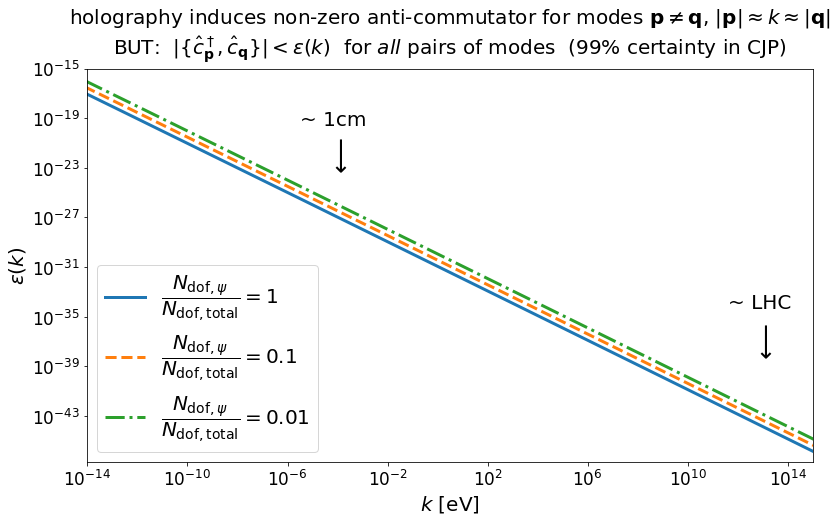

In [3]:

#######
#
# Reproducing Figure 3 of Friedrich, Cao, Carroll, Cheng & Singh (2024)
#
#######


plt.figure(figsize=(12,7))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k$ [eV]", size=20)
plt.ylabel(r"$\epsilon(k)$", size=20)
plt.title(r"holography induces non-zero anti-commutator for modes $\mathbf{p}\neq\mathbf{q}$, $|\mathbf{p}|\approx k \approx |\mathbf{q}|$"+'\n'+r"BUT:  $|\lbrace \hat{c}_{\mathbf{p}}^\dagger , \hat{c}_{\mathbf{q}}\rbrace | < \epsilon(k)$  for $all$ pairs of modes  (99% certainty in CJP)", size=20, pad=15)
dummy = plt.xticks(size=17)
dummy = plt.yticks(size=17)


rescale = E_Planck_in_eV
k_min_in_eV = 1.0e-18
k_max_in_eV = 1.0e16
k_in_eV = np.geomspace(k_min_in_eV, k_max_in_eV, 20000)



def epsilon_of_k(k_in_ev, dof_ratio=1, alpha=0.01, delta_JL=0.01, L_UV_in_Planck=1.0):
    kL = k_in_ev/E_Planck_in_eV*L_IR
    return np.sqrt(16.*(3.0*np.log(kL) + np.log(alpha/(np.pi**2*np.sqrt(delta_JL))))/(alpha*np.pi*kL**2)) / np.sqrt(dof_ratio)*L_UV_in_Planck




plt.plot(k_in_eV, epsilon_of_k(k_in_eV), linewidth=3, linestyle='solid', label=r'$\dfrac{N_{\mathrm{dof},\psi}}{N_{\mathrm{dof, total}}}= 1$')
plt.plot(k_in_eV, epsilon_of_k(k_in_eV, dof_ratio=0.1), linewidth=3, linestyle='dashed', label=r'$\dfrac{N_{\mathrm{dof},\psi}}{N_{\mathrm{dof, total}}}= 0.1$')
plt.plot(k_in_eV, epsilon_of_k(k_in_eV, dof_ratio=0.01), linewidth=3, linestyle='-.', label=r'$\dfrac{N_{\mathrm{dof},\psi}}{N_{\mathrm{dof, total}}}= 0.01$')


k_LHC_in_eV = 13.0e12
plt.text(k_LHC_in_eV, 1.0e-38, r'$\longrightarrow$', ha='center', size=25, rotation=270, fontstretch=1000)
plt.text(k_LHC_in_eV, 5.0e-35, '~ LHC  ', ha='center', size=20)


k_cm_in_eV = 2.0*np.pi/cm_in_Planck*E_Planck_in_eV
plt.text(k_cm_in_eV, 1.0e-23, r'$\longrightarrow$', ha='center', size=25, rotation=270, fontstretch=1000)
plt.text(k_cm_in_eV, 3.0e-20, '~ 1cm  ', ha='center', size=20)


plt.legend(fontsize=20, loc='lower left')
plt.xlim(1.0e-14, 1.0e15)
plt.ylim(0.2e-46, 1.0e-15)

plt.subplots_adjust(left=0.13, bottom=0.1, right=0.97, top=0.88)


plt.savefig('plots/epsilon_of_k.pdf')


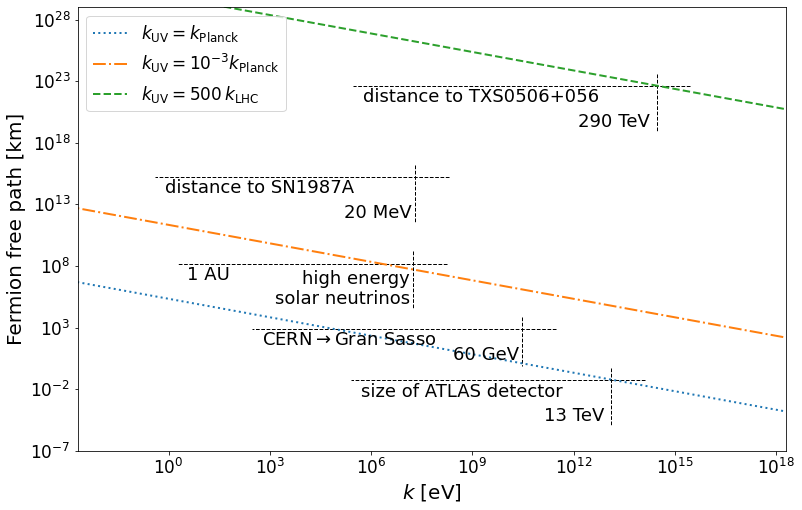

In [4]:

#######
#
# Reproducing Figure 4 of Friedrich, Cao, Carroll, Cheng & Singh (2024)
#
#######


plt.figure(figsize=(12,7))
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"$k$ [eV]", size=20)
plt.ylabel(r"Fermion free path [km]", size=20)
dummy = plt.xticks(size=17)
dummy = plt.yticks(size=17)

fdof = 0.01
alpha = 0.01

k_min_in_eV = 1.0e-14
k_max_in_eV = 2.0e18
k_in_eV = np.geomspace(k_min_in_eV, k_max_in_eV, 20000)
k_in_Planck = k_in_eV/E_Planck_in_eV
k_in_LIRinv = k_in_Planck*L_IR
kInv_in_Planck = 1.0/k_in_Planck
kInv_in_cm = kInv_in_Planck/cm_in_Planck


path_in_cm = 2.0*np.pi**2*np.sqrt(alpha*k_in_LIRinv)*kInv_in_cm*fdof
path_in_km = path_in_cm*1.0e-5

plt.plot(k_in_eV, path_in_km, label=r'$k_{\mathrm{UV}}=k_{\mathrm{Planck}}$', linestyle='dotted', linewidth=2)
plt.plot(k_in_eV, path_in_km*1.0e6, label='$k_{\mathrm{UV}}=10^{-3}k_{\mathrm{Planck}}$', linestyle='-.', linewidth=2)
plt.plot(k_in_eV, path_in_km/(5.4e-13)**2, label='$k_{\mathrm{UV}}=500\, k_{\mathrm{LHC}}$', linestyle='dashed', linewidth=2)

AU_in_km = 1.496e+8
k_solar_nu_max = 18.0e6
k_solar_nu_typical = 0.4e6
x = k_solar_nu_max
y = AU_in_km
plt.vlines(x, 10.0*y, 2.0e-4*y, color='black', linewidth=1, linestyle='dashed')
plt.hlines(y, 10.0*x, 1.0e-7*x, color='black', linewidth=1, linestyle='dashed')
plt.text(0.8*x, 0.0005*y, "high energy\nsolar neutrinos", size=18, horizontalalignment='right')
plt.text(2.0e-7*x, 0.05*y, "1 AU", size=18, horizontalalignment='left')
#
x = 13.0e12
y = 0.05
plt.vlines(x, 10.0*y, 2.0e-4*y, color='black', linewidth=1, linestyle='dashed')
plt.hlines(y, 10.0*x, 2.0e-8*x, color='black', linewidth=1, linestyle='dashed')
plt.text(0.65*x, 0.0005*y, "13 TeV", size=18, horizontalalignment='right')
plt.text(4.0e-8*x, 0.05*y, "size of ATLAS detector", size=18, horizontalalignment='left')
#
x = 0.03e12
y = 731
plt.vlines(x, 10.0*y, 1.0e-3*y, color='black', linewidth=1, linestyle='dashed')
plt.hlines(y, 10.0*x, 1.0e-8*x, color='black', linewidth=1, linestyle='dashed')
plt.text(0.8*x, 0.003*y, "60 GeV", size=18, horizontalalignment='right')
plt.text(2.0e-8*x, 0.05*y, r"CERN$\rightarrow$Gran Sasso", size=18, horizontalalignment='left')
#
x = 0.00002e12
y = 1.6e15
plt.vlines(x, 10.0*y, 2.0e-4*y, color='black', linewidth=1, linestyle='dashed')
plt.hlines(y, 10.0*x, 2.0e-8*x, color='black', linewidth=1, linestyle='dashed')
plt.text(0.8*x, 0.0005*y, "20 MeV", size=18, horizontalalignment='right')
plt.text(4.0e-8*x, 0.05*y, "distance to SN1987A", size=18, horizontalalignment='left')
#
x = 290.0e12
y = 4.1e22
plt.vlines(x, 10.0*y, 2.0e-4*y, color='black', linewidth=1, linestyle='dashed')
plt.hlines(y, 10.0*x, 1.0e-9*x, color='black', linewidth=1, linestyle='dashed')
plt.text(0.65*x, 0.0005*y, "290 TeV", size=18, horizontalalignment='right')
plt.text(2.0e-9*x, 0.05*y, "distance to TXS0506+056", size=18, horizontalalignment='left')



plt.xlim(2.0e-3, 2.0e18)
plt.ylim(1.0e-7, 1.0e29)


plt.subplots_adjust(left=0.15, bottom=0.11, right=0.97, top=0.99)

plt.legend(fontsize=17, frameon=True, loc='upper left')
plt.savefig('plots/L_scramble_vs_k_all_events.pdf')
plt.show()

In [5]:

# loading data that was simulated for Friedrich, Cao, Carroll, Cheng & Singh (2024)

data2 = np.loadtxt('overlapping_qubits_data/combined_results_n=2_seed=3_Hmode=0_Nrun=640.dat')
data4 = np.loadtxt('overlapping_qubits_data/combined_results_n=4_seed=3_Hmode=0_Nrun=640.dat')
data6 = np.loadtxt('overlapping_qubits_data/combined_results_n=6_seed=3_Hmode=0_Nrun=640.dat')
data8 = np.loadtxt('overlapping_qubits_data/combined_results_n=8_seed=3_Hmode=0_Nrun=640.dat')
data10 = np.loadtxt('overlapping_qubits_data/combined_results_n=10_seed=3_Hmode=0_Nrun=640.txt')
data12 = np.loadtxt('overlapping_qubits_data/combined_results_n=12_seed=3_Hmode=0_Nrun=640.txt')

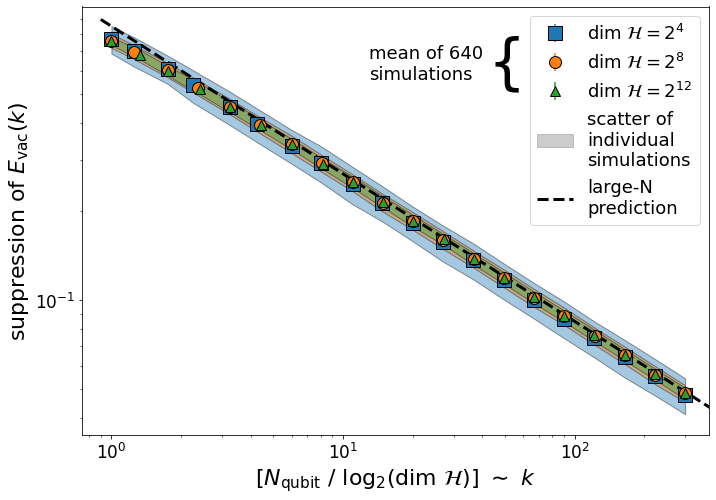

In [6]:

#######
#
# Reproducing Figure 5 of Friedrich, Cao, Carroll, Cheng & Singh (2024)
#
#######

plt.figure(figsize=(10,7))

min_row=0
max_row=25

xx = data4[min_row:max_row,1]/data4[min_row:max_row,0]
yy = -data4[min_row:max_row,14]/(0.5*data4[min_row:max_row,1])
dd = data4[min_row:max_row,15]/(0.5*data4[min_row:max_row,1])
plt.errorbar(xx, yy, dd, markersize=14, fmt='s', label=r'$\mathrm{dim}\ \mathcal{H} = 2^{4}$', mec='black')
plt.fill_between(xx, yy-dd*np.sqrt(640.0), yy+dd*np.sqrt(640.0), color='tab:blue', alpha = 0.4, edgecolor='black')

xx = data8[min_row:max_row,1]/data8[min_row:max_row,0]
yy = -data8[min_row:max_row,14]/(0.5*data8[min_row:max_row,1])
dd = data8[min_row:max_row,15]/(0.5*data8[min_row:max_row,1])
plt.errorbar(xx, yy, dd, markersize=12, fmt='o', label=r'$\mathrm{dim}\ \mathcal{H} = 2^{8}$', mec='black')
plt.fill_between(xx, yy-dd*np.sqrt(640.0), yy+dd*np.sqrt(640.0), color='tab:orange', alpha = 0.4, edgecolor='black')

xx = data12[min_row:max_row,1]/data12[min_row:max_row,0]
yy = -data12[min_row:max_row,14]/(0.5*data12[min_row:max_row,1])
dd = data12[min_row:max_row,15]/(0.5*data12[min_row:max_row,1])
plt.errorbar(xx, yy, dd, markersize=10, fmt='^', label=r'$\mathrm{dim}\ \mathcal{H} = 2^{12}$', mec='black')
plt.fill_between(xx, yy-dd*np.sqrt(640.0), yy+dd*np.sqrt(640.0), color='tab:green', alpha = 0.4, edgecolor='black')


plt.fill_between([-100, -90], [-100, -100], [-200, -200], label='scatter of\nindividual\nsimulations', color='grey', alpha = 0.4)

amplitude = 8.0/3/np.pi

xx = np.array([0.9, 400.0])
yy = amplitude/np.sqrt(xx)
plt.plot(xx, yy, linestyle='dashed', color='black', label='large-N\nprediction', linewidth=3)
plt.xscale('log')
plt.yscale('log')
dummy = plt.xticks(size=17)
dummy = plt.yticks(size=17)

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[2:]+[handles[1]]+[handles[0]]
labels = labels[2:]+[labels[1]]+[labels[0]]
plt.legend(fontsize=18, handles=handles, labels=labels, loc='upper right')

plt.text(42, 0.55, r'$\{$', size=60)
plt.text(13, 0.56, 'mean of 640\nsimulations', size=18)


plt.xlabel(r"$[N_{\mathrm{qubit}}\ /\ \log_2(\mathrm{dim}\ \mathcal{H})]\ \sim\ k$", size=22)
plt.ylabel(r"suppression of $E_{\mathrm{vac}}(k)$", size=22)

plt.xlim(0.75, 380)
plt.ylim(0.035, 0.99)

plt.subplots_adjust(left=0.11, right=0.98, top=0.97, bottom=0.12)


plt.savefig("plots/Evac_suppression.pdf")


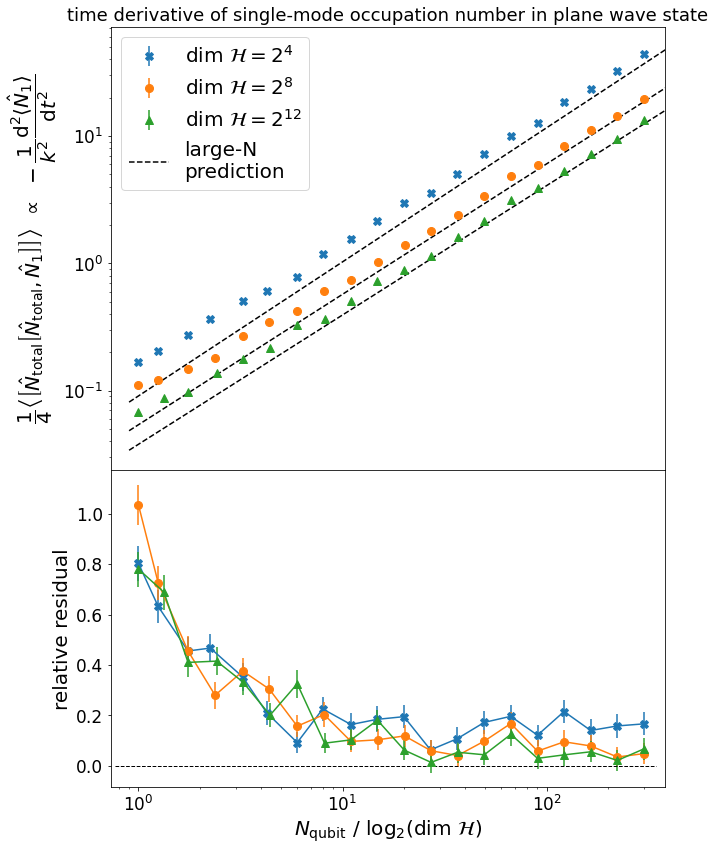

In [7]:

#######
#
# Reproducing Figure 7 of Friedrich, Cao, Carroll, Cheng & Singh (2024)
#
#######

fig, (ax1, ax2) = plt.subplots(2, sharex=True,
                           gridspec_kw={'height_ratios': [7,5]},
                           figsize=(10.0, 12.0))


#### ax1 ###


min_row=0
max_row=25
ax1.errorbar(data4[min_row:max_row,1]/data4[min_row:max_row,0], -data4[min_row:max_row,2], data4[min_row:max_row,3], markersize=8, fmt='X', label=r'$\mathrm{dim}\ \mathcal{H} = 2^4$')
ax1.errorbar(data8[min_row:max_row,1]/data8[min_row:max_row,0], -data8[min_row:max_row,2], data8[min_row:max_row,3], markersize=8, fmt='o', label=r'$\mathrm{dim}\ \mathcal{H} = 2^8$')
ax1.errorbar(data12[min_row:max_row,1]/data12[min_row:max_row,0], -data12[min_row:max_row,2], data12[min_row:max_row,3], markersize=8, fmt='^', label=r'$\mathrm{dim}\ \mathcal{H} = 2^{12}$')
#
ns = 4
yy = (xx*ns - 1)/ns**2*0.5
ax1.plot(xx, yy, linestyle='dashed', linewidth=1.5, color='black', label='large-N\nprediction')
ns = 8
yy = (xx*ns - 1)/ns**2*0.5
ax1.plot(xx, yy, linestyle='dashed', linewidth=1.5, color='black')
ns = 12
yy = (xx*ns - 1)/ns**2*0.5
ax1.plot(xx, yy, linestyle='dashed', linewidth=1.5, color='black')
#
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='both', labelsize=17)
ax1.set_xlabel(r"$N_{\mathrm{qubit}}\ /\ \log_2(\mathrm{dim}\ \mathcal{H})$", size=20)
ax1.set_ylabel(r"$\dfrac{1}{4}\left\langle\left[ \hat{N}_{\mathrm{total}} \left[\hat{N}_{\mathrm{total}}, \hat{N}_{1}\right]\right]\right\rangle\ \ \varpropto\ \ -\dfrac{1}{k^2} \dfrac{\mathrm{d}^2 \langle\hat{N}_1\rangle}{\mathrm{d} t^2}$", size=20)


handles, labels = ax1.get_legend_handles_labels()
handles = handles[1:]+[handles[0]]
labels = labels[1:]+[labels[0]]
ax1.legend(fontsize=20, handles=handles, labels=labels)
ax1.set_xlim(0.73, 380)
ax1.set_xlim(0.73, 3800)

### ax2 ###

xx = data4[min_row:max_row,1]/data4[min_row:max_row,0]
ns = 4
yy = (xx*ns - 1)/ns**2*0.5
dd = -data4[min_row:max_row,2]
ee = data4[min_row:max_row,3]
ax2.errorbar(xx, dd/yy-1, ee/yy, markersize=8, fmt='-X', label=r'$\mathrm{dim}\ \mathcal{H} = 2^4$')
#
xx = data8[min_row:max_row,1]/data8[min_row:max_row,0]
ns = 8
yy = (xx*ns - 1)/ns**2*0.5
dd = -data8[min_row:max_row,2]
ee = data8[min_row:max_row,3]
ax2.errorbar(xx, dd/yy-1, ee/yy, markersize=8, fmt='-o', label=r'$\mathrm{dim}\ \mathcal{H} = 2^8$')
#
xx = data12[min_row:max_row,1]/data12[min_row:max_row,0]
ns = 12
yy = (xx*ns - 1)/ns**2*0.5
dd = -data12[min_row:max_row,2]
ee = data12[min_row:max_row,3]
ax2.errorbar(xx, dd/yy-1, ee/yy, markersize=8, fmt='-^', label=r'$\mathrm{dim}\ \mathcal{H} = 2^{12}$')
#
xx = np.array([0.77, 345])
ax2.plot(xx, 0.0*xx, linestyle='dashed', linewidth=1, color='black')
#
ax2.set_xscale('log')
ax2.tick_params(axis='both', labelsize=17)
ax2.set_xlabel(r"$N_{\mathrm{qubit}}\ /\ \log_2(\mathrm{dim}\ \mathcal{H})$", size=20)
ax2.set_ylabel(r"relative residual", size=20)
ax2.set_xlim(0.73, 380)

plt.subplots_adjust(left=0.15, right=0.92, top=0.96, bottom=0.08, hspace=0)
ax1.set_title('time derivative of single-mode occupation number in plane wave state', size=18)

plt.savefig("plots/d2N_dt2.pdf")

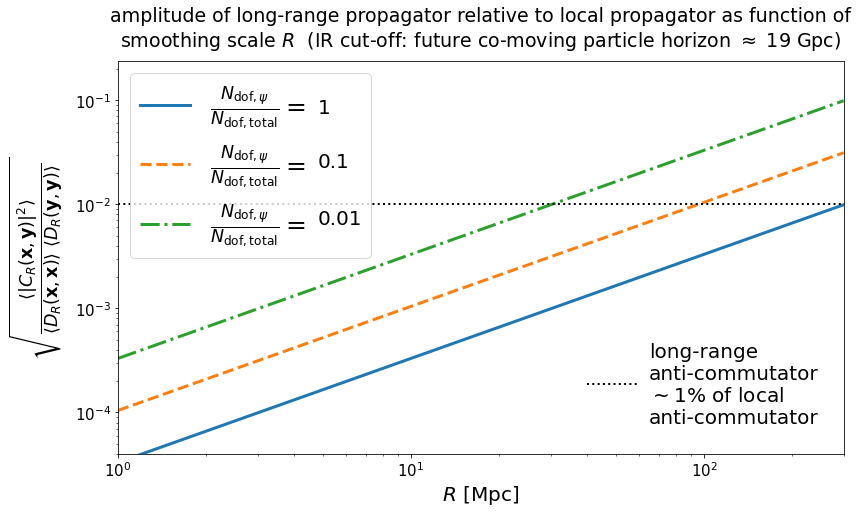

In [8]:

#######
#
# Reproducing Figure 8 of Friedrich, Cao, Carroll, Cheng & Singh (2024)
#
#######


R_max = L_IR_in_Mpc/8
R_max = 300
R_min = 1.0
R_values = np.geomspace(R_min, R_max, 1000)


N_ratio = 1
C_ratio_1 = 1/(N_ratio*(np.pi*L_IR_in_Mpc/(2.0*R_values))**2)
N_ratio = 0.1
C_ratio_2 = 1/(N_ratio*(np.pi*L_IR_in_Mpc/(2.0*R_values))**2)
N_ratio = 0.01
C_ratio_3 = 1/(N_ratio*(np.pi*L_IR_in_Mpc/(2.0*R_values))**2)


plt.figure(figsize=(12,7))


plt.loglog(R_values, np.sqrt(C_ratio_1), linewidth=3, linestyle='solid', label=r'$\frac{N_{\mathrm{dof},\psi}}{N_{\mathrm{dof, total}}}=$       ${}$')
plt.loglog(R_values, np.sqrt(C_ratio_2), linewidth=3, linestyle='dashed', label=r'$\frac{N_{\mathrm{dof},\psi}}{N_{\mathrm{dof, total}}}=$')
plt.loglog(R_values, np.sqrt(C_ratio_3), linewidth=3, linestyle='-.', label=r'$\frac{N_{\mathrm{dof},\psi}}{N_{\mathrm{dof, total}}}=$')
plt.loglog(R_values, 0.01+0.0*C_ratio_3, linewidth=2, linestyle='dotted', color='black')


plt.text(4.8, 0.94/(4*np.pi), '1', size=20, zorder=20)
plt.text(4.8, 0.94/(4*np.pi)/3.67*1.1, '0.1', size=20, zorder=20)
plt.text(4.8, 0.94/(4*np.pi)/3.67**2*1.149, '0.01', size=20, zorder=20)

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('$R$ [Mpc]', size=20)
plt.ylabel(r'$\sqrt{\frac{\langle |C_R(\mathbf{x},\mathbf{y})|^2 \rangle}{\langle D_R(\mathbf{x},\mathbf{x}) \rangle\ \langle D_R(\mathbf{y},\mathbf{y}) \rangle}}$', size=25, labelpad=10)
plt.title('amplitude of long-range propagator relative to local propagator as function of\n'+r'smoothing scale $R$  (IR cut-off: future co-moving particle horizon $\approx$ 19 Gpc)', size=19, pad=15)
plt.xlim(np.min(R_values), np.max(R_values))
plt.ylim(0.0005/(4*np.pi), 3/(4*np.pi))


plt.text(65, 0.0007/(4*np.pi)*1.4, 'long-range\nanti-commutator\n$\sim 1\%$ of local\nanti-commutator', size=20, zorder=20)
plt.loglog([40, 60], [0.0017/(4*np.pi)*1.4, 0.0017/(4*np.pi)*1.4], linewidth=2, linestyle='dotted', color='black')


plt.legend(fontsize=25, loc='upper left')

plt.subplots_adjust(left=0.13, bottom=0.1, right=0.97, top=0.88)
plt.savefig('plots/relative_longrange_propagator.pdf')